In [1]:
#!pip install sqlalchemy pandas mlxtend seaborn
%load_ext autoreload
%autoreload 2

# Verbimallid apriori

## Märkused

sagedasemad sõnavormid: palju varieerumist nt äikesevihm, sügisevihm, vihm


## Ülesande kirjeldus
1. Trandaktsioonide sisu filtreerimine
    - Kadrit ei huvita vebile alluvad kirjavahemärgid
    - Kadrit ei huvita verbile alluv kõrvallause.
      (ma sõin putru ja vaatasin televiisorit) 
      Vastav alampuu on spetsiifilise deprel nimega (sinu näites cc ja veel ka conj)
      Kontrolli seda ise vaadates erinevaid liitlauseid läbi. Kadri saab sind selles osas aidata
   - Vaata et transaktsiooni ei jääks ühendverbi liite osa (kirjutas maha --> maha), sest see on müra

2. Transaktsiooni item-ite moodustamine
    - Kadri meelest pole ainuse ja mitmuse eristamine oluline välja arvatud subject/objekt tippudes
    - Item peaks olema deprel + form. 
      Sul on mingit tipud deprel + form1, form2 kuidas see tekkida sai
      Näiteks {'deprel': 'nsubj', 'feats': 'com,nom,sg'} -- kas see on mitmene morf analüüs? Kui jah, kas sa saad siis com | nom kasutada
- sõnavormide lisamine item-i sisse. 
Võiks olla mingi lävend, et kui sõnavorm on antud deprel-i all sagedamini kui 20% siis jääb see ka alles
magas und --> und on obj ja peaaegfu ainus võimalik obj verbiga magama


3. Itemset mining. Sellele on vaja peale visata almost-closed set filter
 
Sa hakkad tulemusi vaatama kõige pikematest alamhulkadest


Olgu sul pikk alamhulk X sagedusega t_X ja olgu Y selle ühe itemiga vähem hulk st Y + {a} = X 
Siis tuleb hulk Y kustutada kui selle sagedus t_y >= t_x - delta, kus delta on mingi lävend
Standard juhul on delta=0, aga meie rakenduses võiks delta olla 2-5% kui sa mõõdad sagedust protsentides


Kui sa nii, kontrollid elementide arvu järgi tagurpidiselt järjestatud hulki, saad kompaktse esituse, mida meil vaja on


4. Tulemuse esitus


Graafiline heatmap, Pane allesjäänud hulgad 0/1 kodeeringus heatmapile


Järjestus peaks olema SUB, OBJ, OBL1, ...OBLx, muud
Kadri annab täpse järjestuse


## TODO!

* Täpsustada ignoreeritavate deprelide nimekirja. Hetkel: ["cc", "conj", "punct", "mark", "aux"] ja compound:prt kui compound=None
  
*  Järjestada liikmed Kadri etteantud järjekorras (kas sõnad näidetes tuleb järestada ka vastavalt?).
*  Kaaluda kirjavahemärkide jne müra eemaldamist andmestikust. 
*  Parandada apriori tulemuse filtreerimine protsendi järgi


# Algseadistamine

In [7]:

from V30Apriori import V30
v30 = V30(
    "/Users/rabauti/repos/tu/estnltk/syntax_experiments/syntax_experiments__subcat/v30_verb_transactions/v30_koondkorpus_sentences_indexed.db",
    form_treshold_percent = 20,
    form_treshold_count = 5,
    apriori_min_support=0.05,
    apriori_treshold_delta = 0.03,
    apriori_treshold_percent=50
    )
v30._form_treshold_percent = 5 

## armastama

************************************************ armastama   ************************************************
Ridu analüüsimiseks: 19229
apriori min_support: 0.05


,support,itemsets,example
5,0.503302,"((OBJ, part, ))",karistuskava
1,0.452806,"((NSUBJ, nom, ))",dearin
0,0.280930,"((ADVMOD, , ))",sageli
8,0.220552,"((XCOMP, , ))",sõita
12,0.216860,"((OBJ, part, ), (NSUBJ, nom, ))",keda naisnäitlejad
3,0.166207,"((NSUBJ, nom, ma))",ma
9,0.137293,"((NSUBJ, nom, ), (ADVMOD, , ))",eestlased kangesti
10,0.130636,"((OBJ, part, ), (ADVMOD, , ))",ega neid tegelikult
13,0.115139,"((NSUBJ, nom, ), (XCOMP, , ))",pesionärid arutada
14,0.084196,"((OBJ, part, ), (NSUBJ, nom, ma))",ma teid


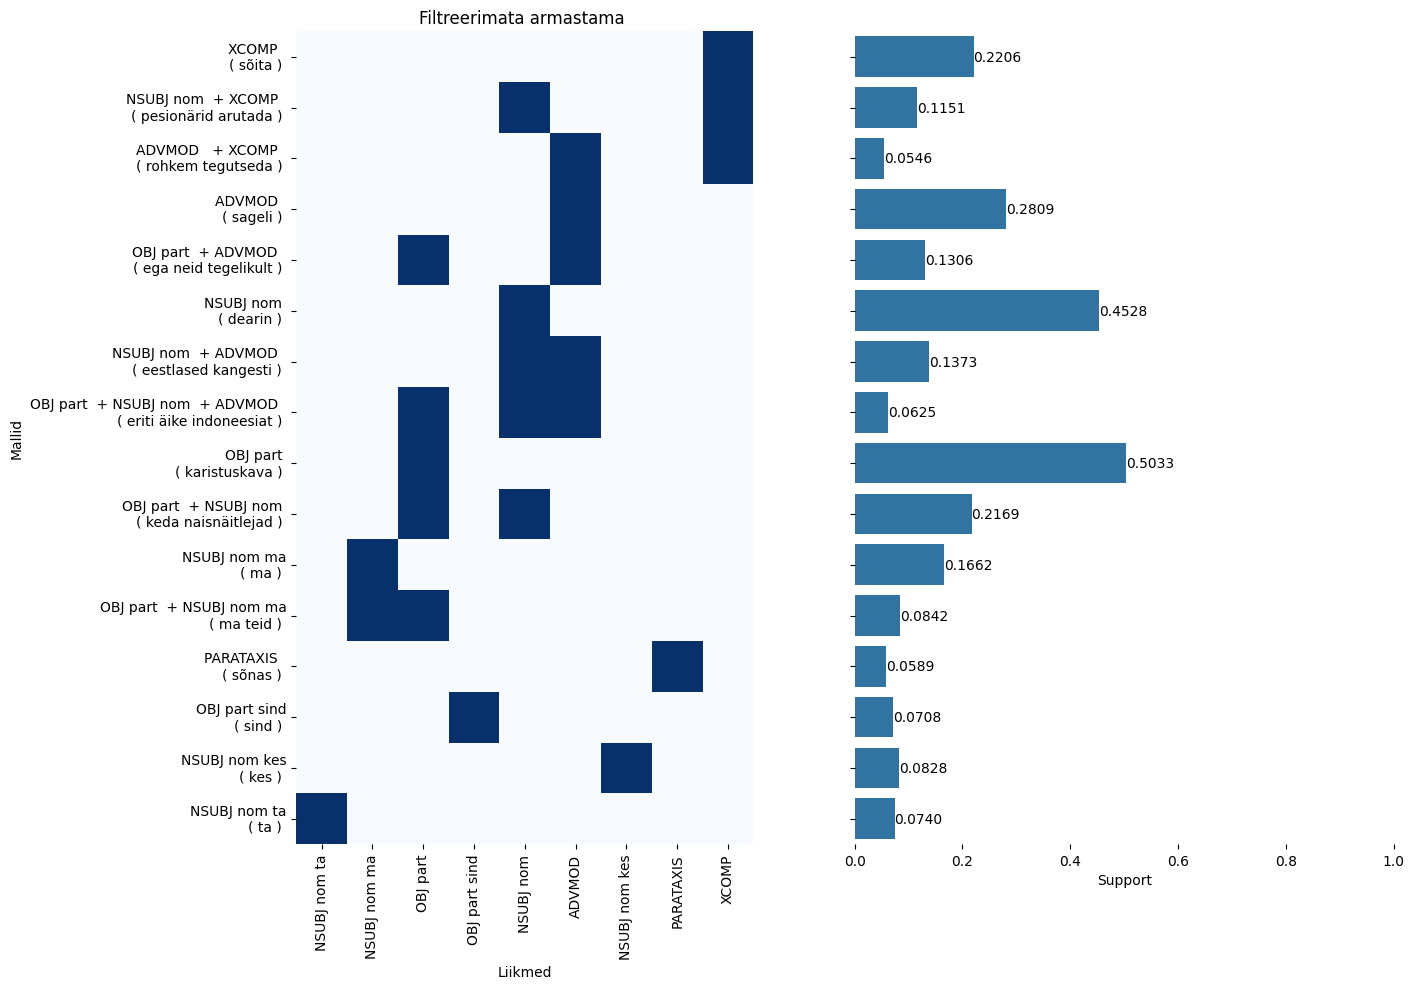

delta: 0.03
percent: 50


,support,itemsets,example,drop,drop_reason,length
5,0.503302,"((OBJ, part, ))",karistuskava,True,(row 14) percent_grow: 83.2713>=50,1
1,0.452806,"((NSUBJ, nom, ))",dearin,True,(row 13) percent_grow: 74.5722>=50,1
0,0.280930,"((ADVMOD, , ))",sageli,True,(row 11) percent_grow: 80.5813>=50,1
8,0.220552,"((XCOMP, , ))",sõita,True,(row 11) percent_grow: 75.2653>=50,1
12,0.216860,"((OBJ, part, ), (NSUBJ, nom, ))",keda naisnäitlejad,True,(row 15) percent_grow: 71.1751>=50,2
3,0.166207,"((NSUBJ, nom, ma))",ma,False,,1
9,0.137293,"((NSUBJ, nom, ), (ADVMOD, , ))",eestlased kangesti,True,(row 15) percent_grow: 54.4697>=50,2
10,0.130636,"((OBJ, part, ), (ADVMOD, , ))",ega neid tegelikult,True,(row 15) percent_grow: 52.1497>=50,2
13,0.115139,"((NSUBJ, nom, ), (XCOMP, , ))",pesionärid arutada,False,,2
14,0.084196,"((OBJ, part, ), (NSUBJ, nom, ma))",ma teid,False,,2


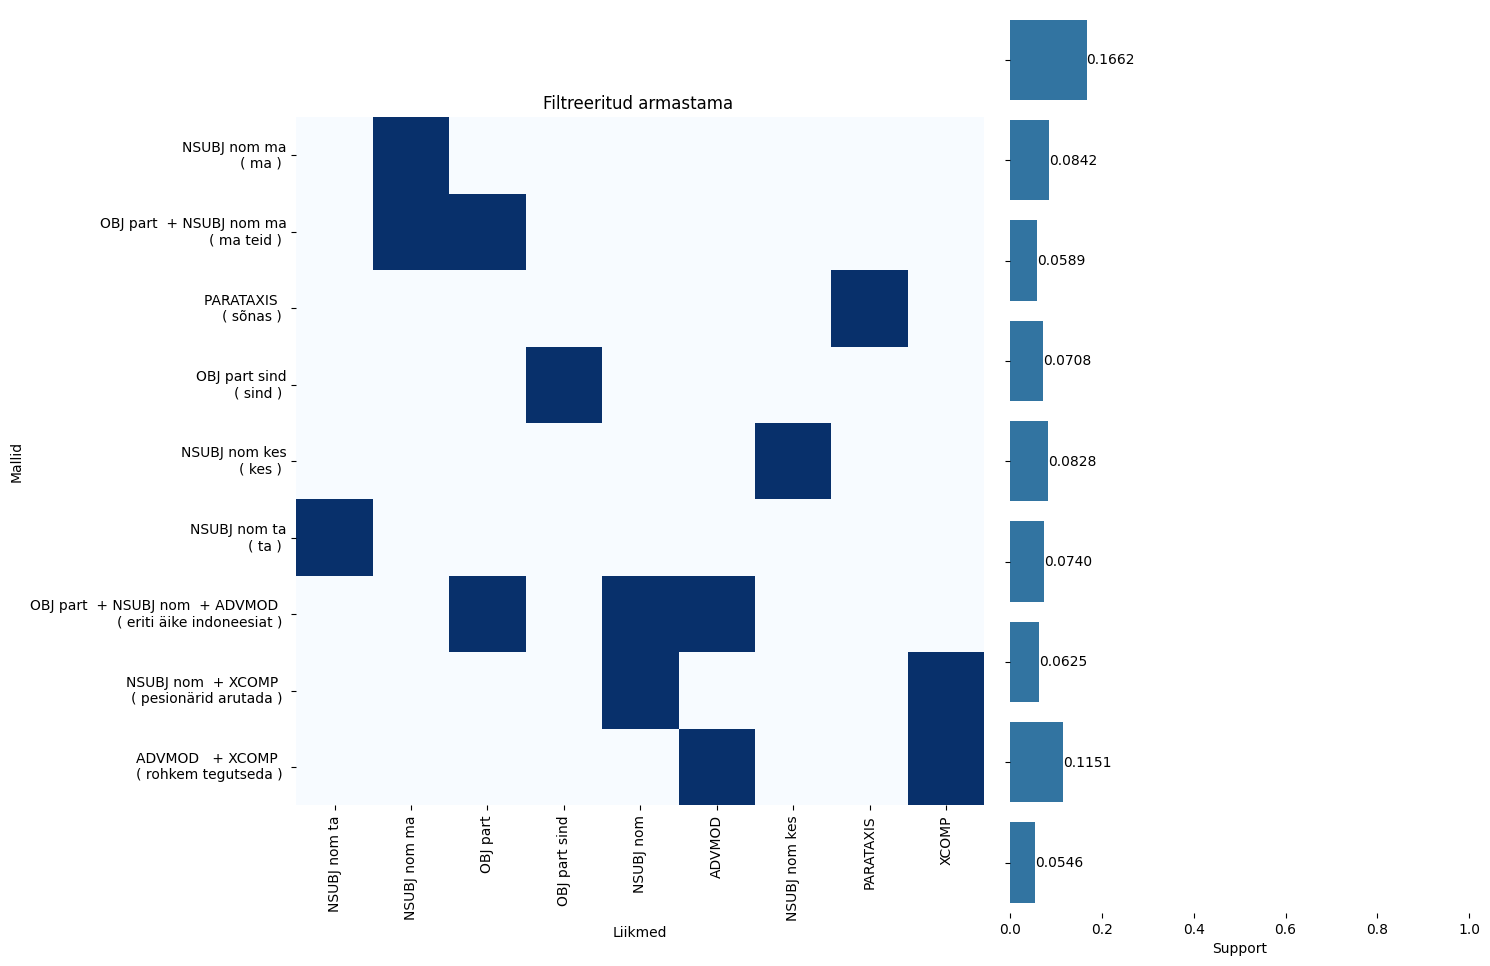

CPU times: user 13.8 s, sys: 3.19 s, total: 17 s
Wall time: 26.4 s


In [8]:
%%time
result = v30.make_all(verb='armastama', verb_compound='', examples=True)


## hüppama alla



************************************************ hüppama  alla ************************************************
Ridu analüüsimiseks: 535
apriori min_support: 0.05


,support,itemsets,example
2,0.400000,"((NSUBJ, nom, ))",sa
5,0.285981,"((OBL, abl, ))",rõdult
9,0.271028,"((OBL, el, aknast))",aknast
1,0.192523,"((ADVMOD, , ))",kohe-kohe
8,0.192523,"((OBL, el, ))",pööninguaknast
10,0.162617,"((OBL, gen, ))",versiooni
7,0.158879,"((OBL, ad, ))",pühapäeval
11,0.128972,"((OBL, in, ))",haiglas
15,0.123364,"((OBL, abl, ), (NSUBJ, nom, ))",kaskadöör tõstukilt kõrguselt
0,0.112150,"((ADVCL, , ))",sooritades


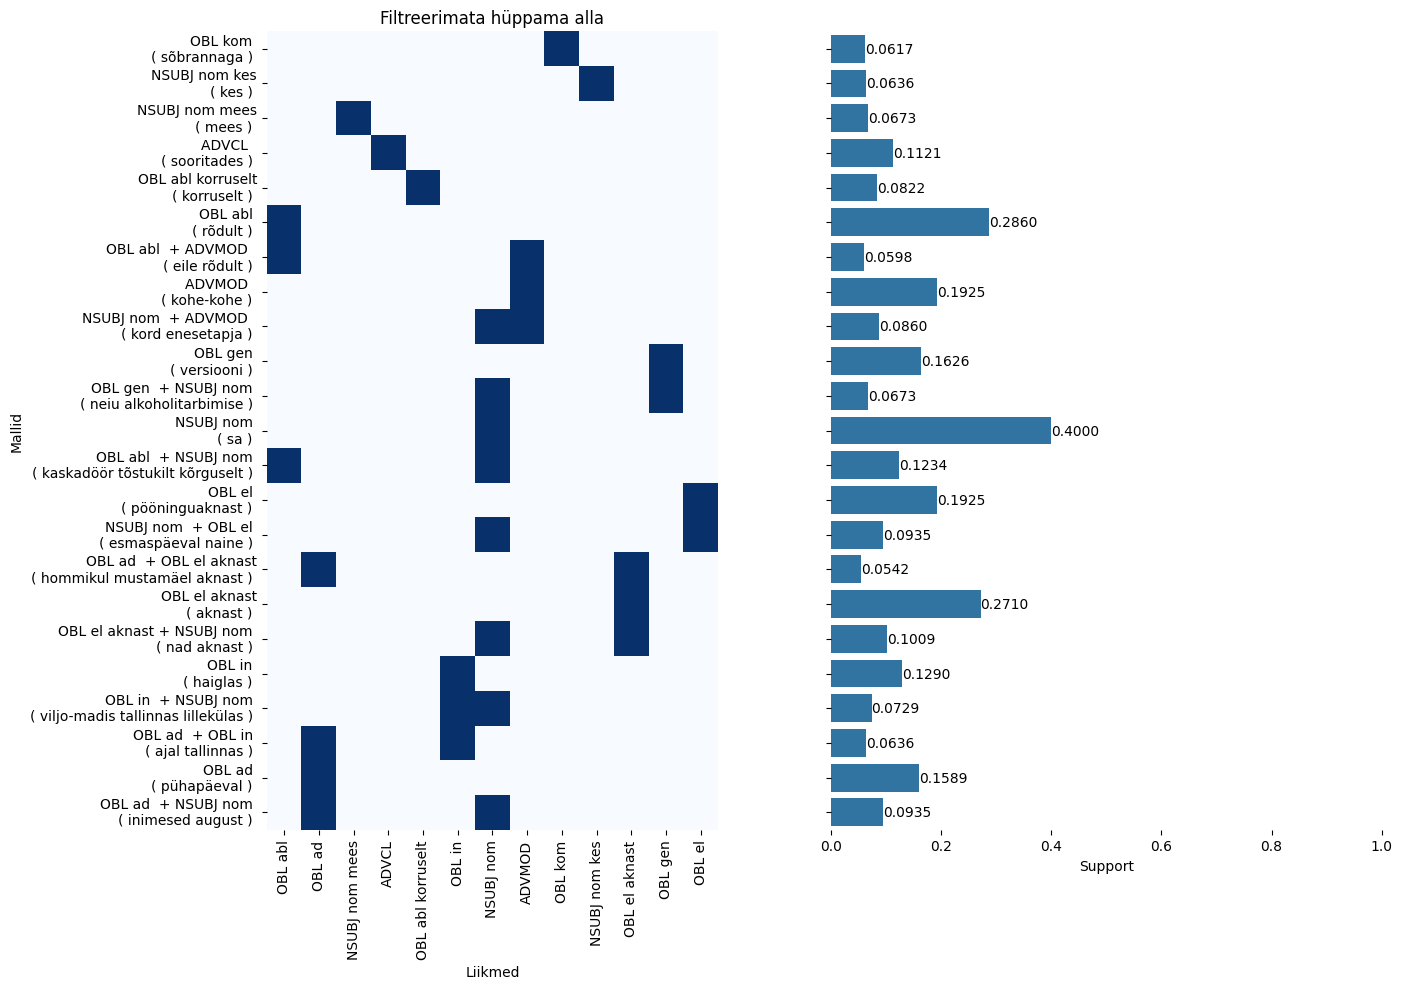

delta: 0.03
percent: 50


,support,itemsets,example,drop,drop_reason,length
2,0.400000,"((NSUBJ, nom, ))",sa,True,(row 15) percent_grow: 69.1589>=50,1
5,0.285981,"((OBL, abl, ))",rõdult,True,(row 15) percent_grow: 56.8627>=50,1
9,0.271028,"((OBL, el, aknast))",aknast,True,(row 21) percent_grow: 80.0000>=50,1
1,0.192523,"((ADVMOD, , ))",kohe-kohe,True,(row 13) percent_grow: 55.3398>=50,1
8,0.192523,"((OBL, el, ))",pööninguaknast,True,(row 17) percent_grow: 51.4563>=50,1
10,0.162617,"((OBL, gen, ))",versiooni,True,(row 19) percent_grow: 58.6207>=50,1
7,0.158879,"((OBL, ad, ))",pühapäeval,True,(row 21) percent_grow: 65.8824>=50,1
11,0.128972,"((OBL, in, ))",haiglas,True,(row 22) percent_grow: 50.7246>=50,1
15,0.123364,"((OBL, abl, ), (NSUBJ, nom, ))",kaskadöör tõstukilt kõrguselt,False,,2
0,0.112150,"((ADVCL, , ))",sooritades,False,,1


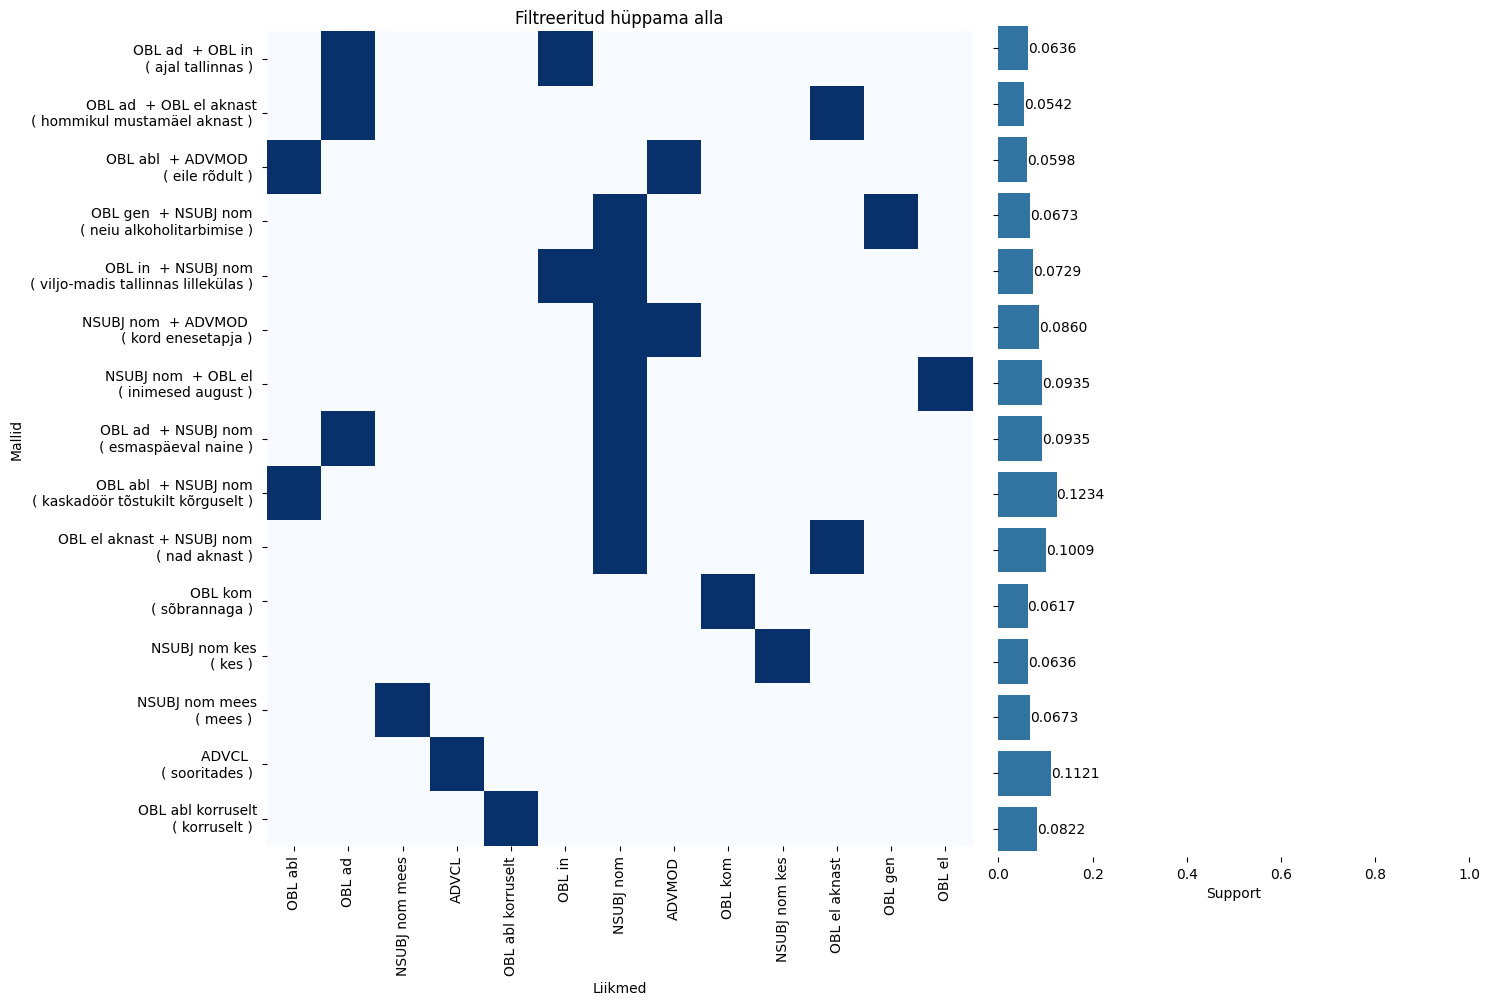

CPU times: user 14 s, sys: 2.8 s, total: 16.8 s
Wall time: 24.3 s


In [4]:
%%time

result = v30.make_all(verb='hüppama', verb_compound='alla', examples=True)

## sadama

************************************************ sadama   ************************************************
Ridu analüüsimiseks: 5819
apriori min_support: 0.05


,support,itemsets,example
0,0.414676,"((ADVMOD, , ))",keskmiselt
4,0.252277,"((NSUBJ, part, vihma))",vihma
5,0.208971,"((OBL, ad, ))",kujul
9,0.174429,"((OBL, in, ))",lehes
3,0.168758,"((NSUBJ, part, lund))",lund
2,0.144698,"((NSUBJ, part, ))",sügisvihma
1,0.138512,"((NSUBJ, nom, ))",patakas
8,0.097783,"((OBL, gen, ))",kaela
13,0.096065,"((NSUBJ, part, vihma), (ADVMOD, , ))",kusagil vihma
14,0.078020,"((OBL, ad, ), (ADVMOD, , ))",nii tänavugi eestimaal erinevalt


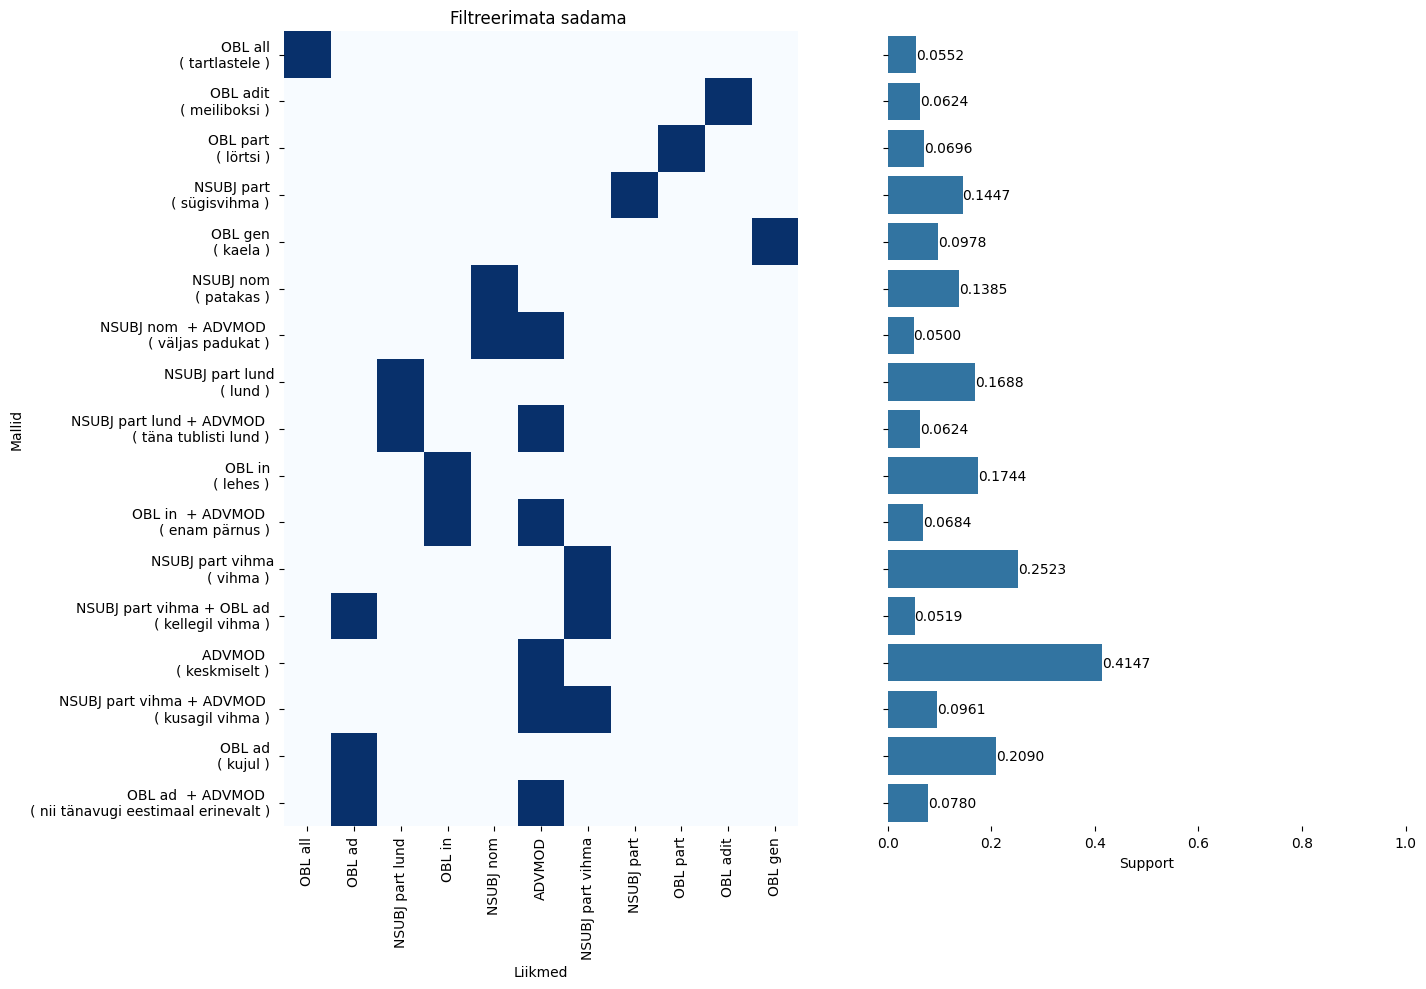

delta: 0.03
percent: 50


,support,itemsets,example,drop,drop_reason,length
0,0.414676,"((ADVMOD, , ))",keskmiselt,True,(row 11) percent_grow: 87.9403>=50,1
4,0.252277,"((NSUBJ, part, vihma))",vihma,True,(row 16) percent_grow: 79.4278>=50,1
5,0.208971,"((OBL, ad, ))",kujul,True,(row 16) percent_grow: 75.1645>=50,1
9,0.174429,"((OBL, in, ))",lehes,True,(row 15) percent_grow: 60.7882>=50,1
3,0.168758,"((NSUBJ, part, lund))",lund,True,(row 12) percent_grow: 63.0346>=50,1
2,0.144698,"((NSUBJ, part, ))",sügisvihma,False,,1
1,0.138512,"((NSUBJ, nom, ))",patakas,True,(row 11) percent_grow: 63.8958>=50,1
8,0.097783,"((OBL, gen, ))",kaela,False,,1
13,0.096065,"((NSUBJ, part, vihma), (ADVMOD, , ))",kusagil vihma,False,,2
14,0.078020,"((OBL, ad, ), (ADVMOD, , ))",nii tänavugi eestimaal erinevalt,False,,2


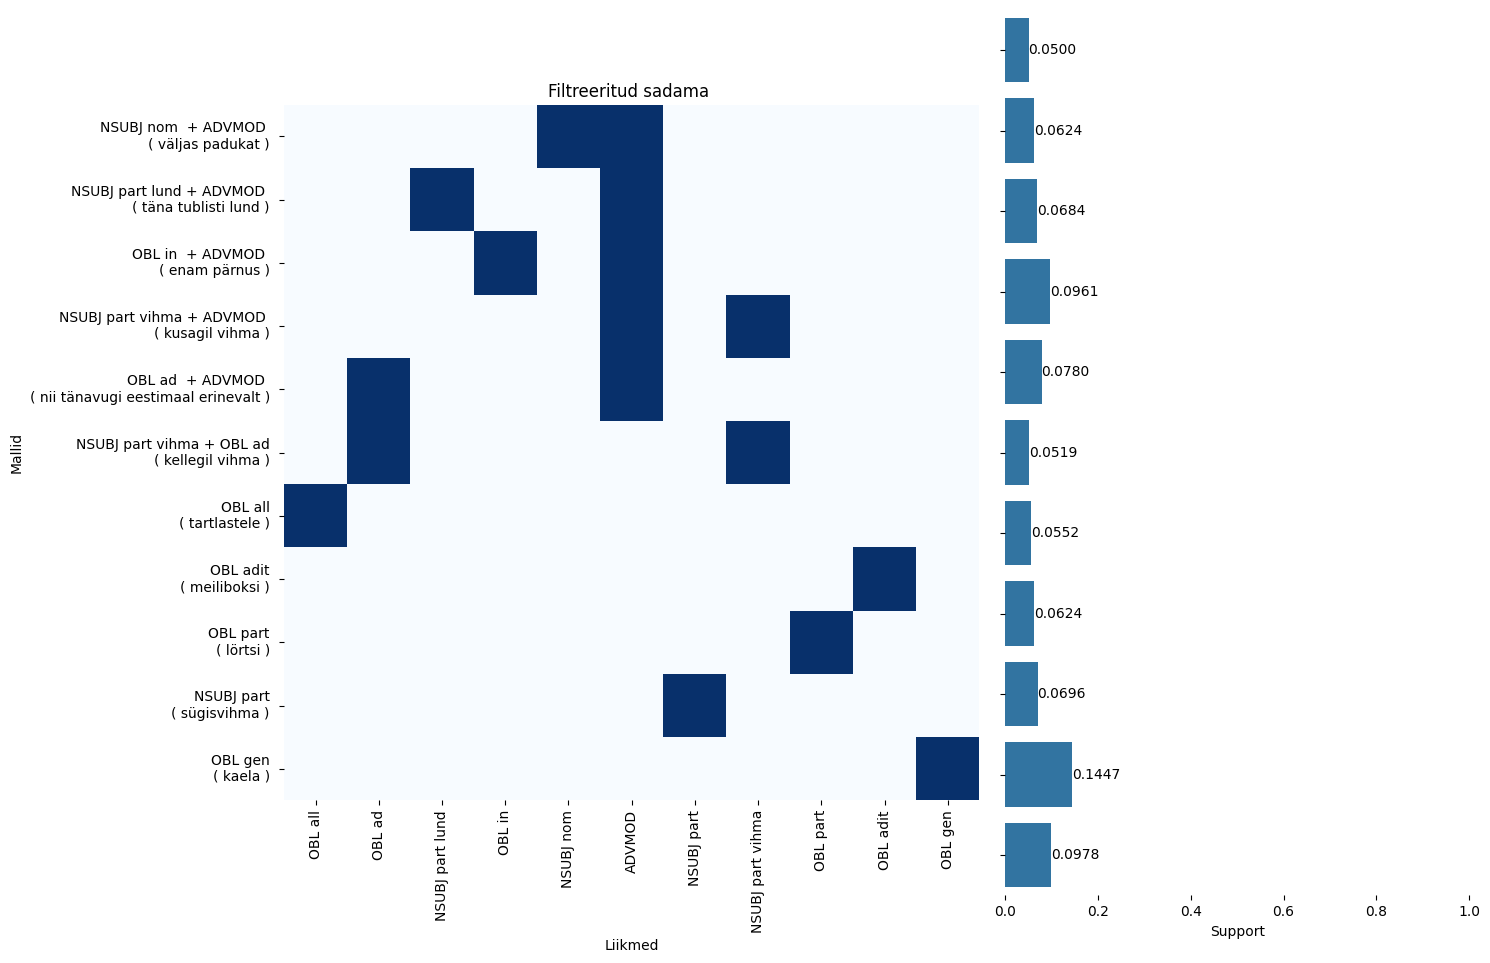

In [6]:
result = v30.make_all(verb='sadama', verb_compound='', examples=True)

## allutama

************************************************ allutama   ************************************************
Ridu analüüsimiseks: 317
apriori min_support: 0.05


,support,itemsets,example
7,0.725552,"((OBL, all, ))",poliitikale
2,0.712934,"((NSUBJ, nom, ))",paragrahv
20,0.504732,"((OBL, all, ), (NSUBJ, nom, ))",mis grupile
3,0.280757,"((OBJ, gen, ))",televisiooni
1,0.261830,"((ADVMOD, , ))",vabatahtlikult
4,0.242902,"((OBJ, nom, ))",vormid
5,0.233438,"((OBJ, part, ))",elu
16,0.214511,"((OBJ, gen, ), (NSUBJ, nom, ))",kuningas võistkonna
23,0.205047,"((OBL, all, ), (OBJ, gen, ))",veelanguse tööle
15,0.189274,"((OBL, all, ), (ADVMOD, , ))",siis enesele


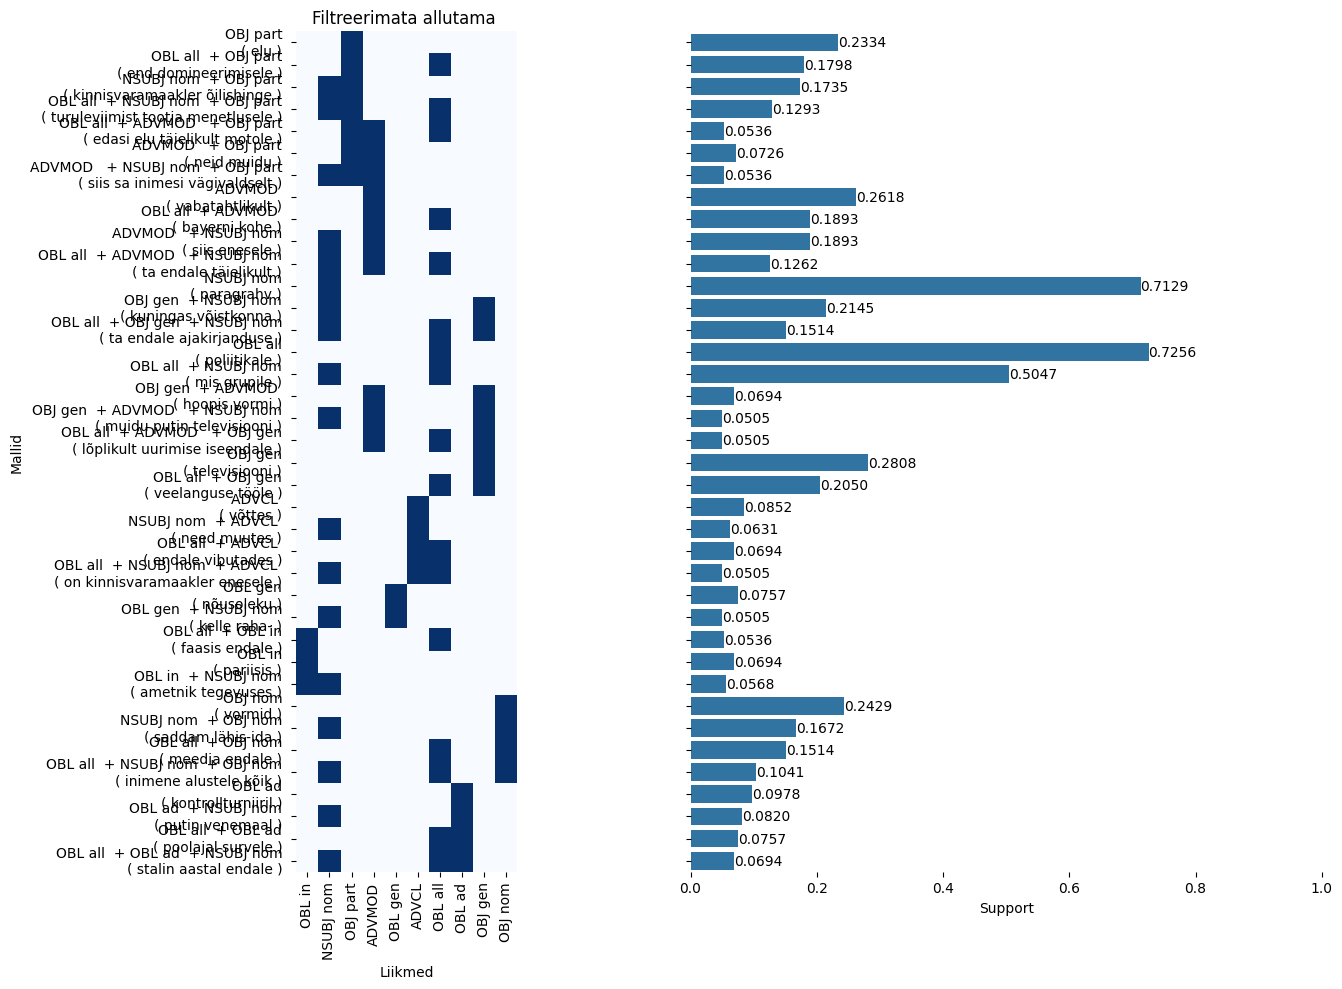

delta: 0.03
percent: 50


,support,itemsets,example,drop,drop_reason,length
7,0.725552,"((OBL, all, ))",poliitikale,True,(row 15) percent_grow: 73.9130>=50,1
2,0.712934,"((NSUBJ, nom, ))",paragrahv,True,(row 10) percent_grow: 91.1504>=50,1
20,0.504732,"((OBL, all, ), (NSUBJ, nom, ))",mis grupile,True,(row 28) percent_grow: 90.0000>=50,2
3,0.280757,"((OBJ, gen, ))",televisiooni,True,(row 13) percent_grow: 75.2809>=50,1
1,0.261830,"((ADVMOD, , ))",vabatahtlikult,True,(row 14) percent_grow: 72.2892>=50,1
4,0.242902,"((OBJ, nom, ))",vormid,True,(row 35) percent_grow: 57.1429>=50,1
5,0.233438,"((OBJ, part, ))",elu,True,(row 14) percent_grow: 68.9189>=50,1
16,0.214511,"((OBJ, gen, ), (NSUBJ, nom, ))",kuningas võistkonna,True,(row 29) percent_grow: 76.4706>=50,2
23,0.205047,"((OBL, all, ), (OBJ, gen, ))",veelanguse tööle,True,(row 32) percent_grow: 75.3846>=50,2
15,0.189274,"((OBL, all, ), (ADVMOD, , ))",siis enesele,True,(row 33) percent_grow: 71.6667>=50,2


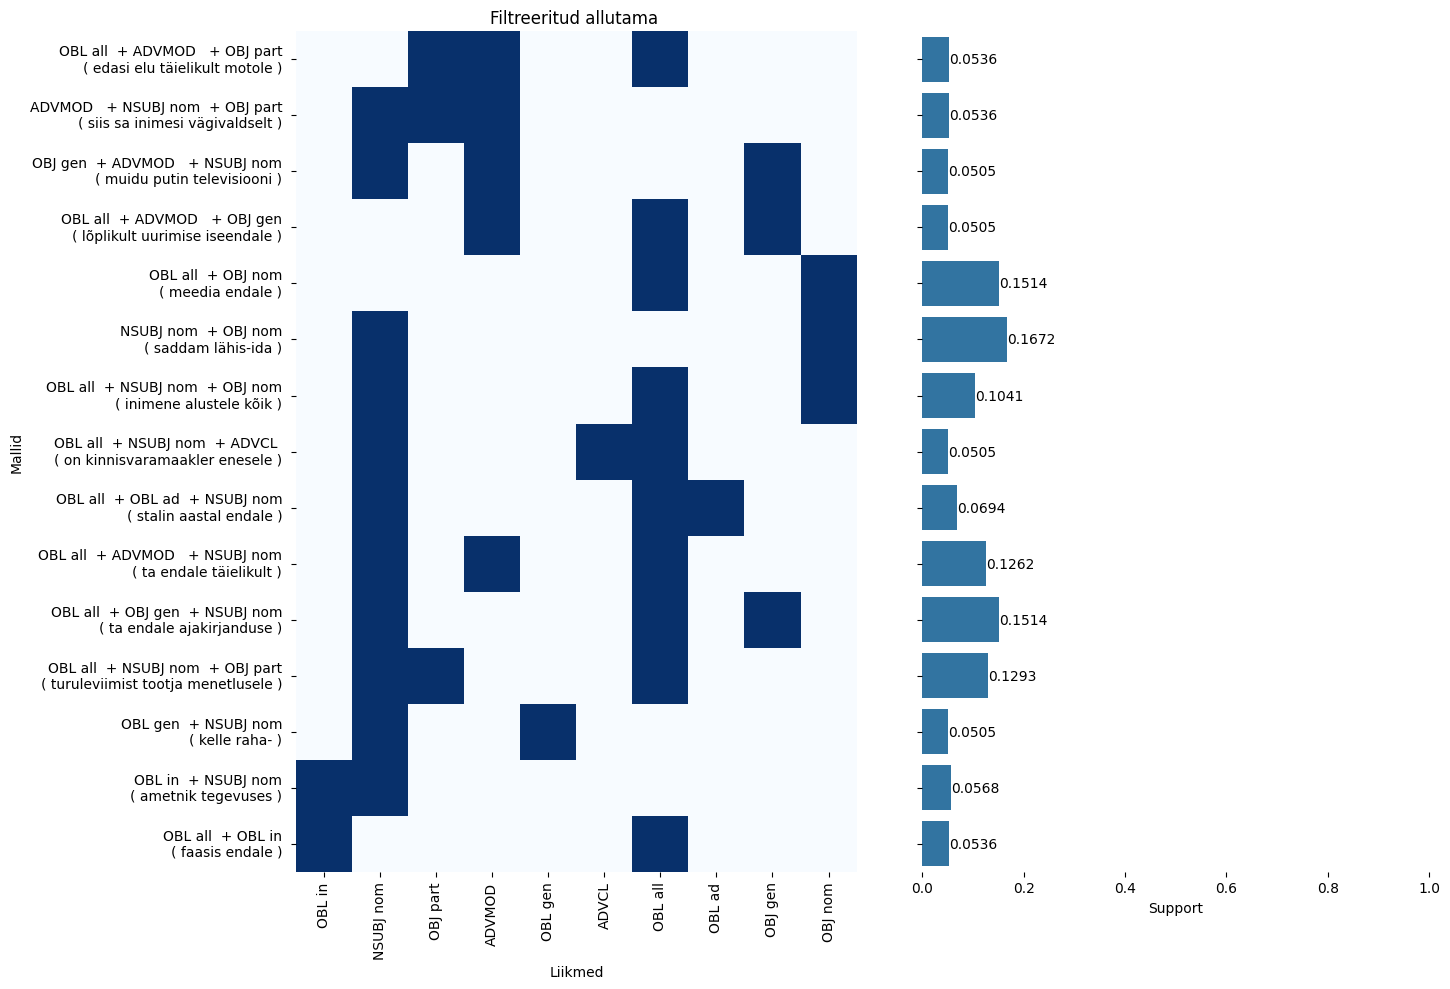

In [ ]:
%%time
result = v30.make_all(verb='allutama', verb_compound='', examples=True)
